Usaremos el algoritmo del flujo máximo

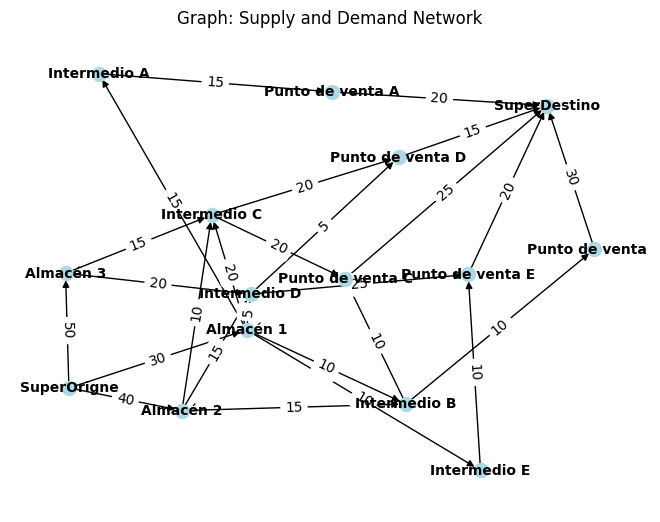

85

In [5]:
import networkx as nx

# Create the graph
G = nx.DiGraph()

# Add super origin and super destination nodes
G.add_node("SuperOrigne")
G.add_node("SuperDestino")

# Add nodes for the supply points (almacenes) and demand points (puntos de venta)
G.add_node("Almacén 1", supply=30)
G.add_node("Almacén 2", supply=40)
G.add_node("Almacén 3", supply=50)
G.add_node("Punto de venta A", demand=20)
G.add_node("Punto de venta B", demand=30)
G.add_node("Punto de venta C", demand=25)
G.add_node("Punto de venta D", demand=15)
G.add_node("Punto de venta E", demand=20)

# Add edges for the transport routes with their capacities
edges = [
    ("SuperOrigne", "Almacén 1", 30),
    ("SuperOrigne", "Almacén 2", 40),
    ("SuperOrigne", "Almacén 3", 50),
    ("Almacén 1", "Intermedio A", 15),
    ("Intermedio A", "Punto de venta A", 15),
    ("Almacén 1", "Intermedio B", 10),
    ("Intermedio B", "Punto de venta B", 10),
    ("Almacén 1", "Intermedio C", 20),
    ("Intermedio C", "Punto de venta C", 20),
    ("Almacén 1", "Intermedio D", 5),
    ("Intermedio D", "Punto de venta D", 5),
    ("Almacén 1", "Intermedio E", 10),
    ("Intermedio E", "Punto de venta E", 10),
    ("Almacén 2", "Intermedio B", 15),
    ("Intermedio B", "Punto de venta C", 10),
    ("Almacén 2", "Intermedio C", 10),
    ("Intermedio C", "Punto de venta D", 15),
    ("Almacén 2", "Intermedio D", 15),
    ("Intermedio D", "Punto de venta E", 5),
    ("Almacén 3", "Intermedio C", 15),
    ("Intermedio C", "Punto de venta D", 20),
    ("Almacén 3", "Intermedio D", 20),
    ("Intermedio D", "Punto de venta E", 25),
    ("Punto de venta A", "SuperDestino", 20),
    ("Punto de venta B", "SuperDestino", 30),
    ("Punto de venta C", "SuperDestino", 25),
    ("Punto de venta D", "SuperDestino", 15),
    ("Punto de venta E", "SuperDestino", 20),
]

# Add the edges to the graph
for u, v, cap in edges:
    G.add_edge(u, v, capacity=cap)

# Visualize the graph
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=100, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph: Supply and Demand Network")
plt.show()

# Now let's implement the Ford-Fulkerson algorithm to calculate the maximum flow.

# Ford-Fulkerson method to find maximum flow with reverse edge initialization
def ford_fulkerson(graph, source, sink):
    # Initialize the residual graph, ensuring reverse edges are initialized
    residual_graph = {u: {v: graph[u][v]['capacity'] for v in graph[u]} for u in graph}
    for u in graph:
        for v in graph[u]:
            if v not in residual_graph:
                residual_graph[v] = {}
            if u not in residual_graph[v]:
                residual_graph[v][u] = 0  # Initialize reverse edge with capacity 0

    max_flow = 0
    
    while True:
        # Find the path with DFS (Depth-First Search)
        parent = {}
        visited = set()
        stack = [(source, float('inf'))]  # (node, flow)
        
        while stack:
            u, flow = stack.pop()
            if u == sink:
                max_flow += flow
                # Update residual capacities
                v = sink
                while v != source:
                    u = parent[v]
                    residual_graph[u][v] -= flow
                    residual_graph[v][u] += flow
                    v = u
                break

            if u not in visited:
                visited.add(u)
                for v in residual_graph[u]:
                    if v not in visited and residual_graph[u][v] > 0:
                        parent[v] = u
                        stack.append((v, min(flow, residual_graph[u][v])))
        
        else:
            # No augmenting path found
            break
    
    return max_flow

# Compute the maximum flow using the Ford-Fulkerson algorithm
max_flow_value = ford_fulkerson(G, "SuperOrigne", "SuperDestino")
max_flow_value
